In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import dataset from external storage
df=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning_projects/main/Customer%20Conversion%20Prediction%20-%20Customer%20Conversion%20Prediction.csv")

In [ ]:
# import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
# check the shape of the data
df.shape   

(45211, 11)

# Data Cleaning 


HANDLING MISSING VALUES 

In [ ]:
# find the null values
df.isnull().sum() 

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

We can see there are no null values, so we can move forward

In [ ]:
# check duplicate values
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [ ]:
# drop duplicate values
df.drop_duplicates(inplace=True, keep = 'first')

In [ ]:
# check duplicate values after removing
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y


CHECKING DATATYPE 

In [ ]:
# check data type of our data
df.dtypes 

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

All the data type are correct so we don't need to change 

COLUMN NAMES CHANGING

In [ ]:
# rename of some column for better understanding
df=df.rename(columns={"mon":"month","dur":"duration"})

NUMERICAL COLUMNS OUTLIER DETECTION 

In [ ]:
# check outliers by describe
df.describe()

,age,day,duration,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


Check Outliers

In [ ]:
#age column outlier removal
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper age bound:",upper,"lower age bound :", lower)
age=[]
for i in df["age"]:
  if lower<=i<=upper:
    age.append(i)
print(len(age))
print(df.shape)

upper age bound: 70.5 lower age bound : 10.5
44718
(45205, 11)


In [ ]:
# Numerical column cleaning
#duration column outlier removal
q1,q3=np.percentile(df["duration"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper call duration:",upper,"lower call duration:", lower)
dur=[]
for i in df["duration"]:
  if lower<=i<=upper:
    dur.append(i)
print(len(dur))

upper call duration: 643.0 lower call duration: -221.0
41970


In [ ]:
#num_calls outlier detection
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper num_calls:",upper,"lower num_calls", lower)
num_calls=[]
for i in df["num_calls"]:
  if lower<=i<=upper:
    num_calls.append(i)
print(len(num_calls))

upper num_calls: 6.0 lower num_calls -2.0
42141


In [ ]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [ ]:
df[(df['age']>70.5) & (df['y'] == 'yes')].shape

(218, 11)

In [ ]:
df[(df['duration']>643) & (df['y'] == 'yes')].shape

(1651, 11)

In [ ]:
df[(df['num_calls']>6) & (df['y'] == 'yes')].shape

(161, 11)

Interpretation:-
    Extrem values are also very important, so we can't drop it

In [ ]:
# remove all the outliers and assign into new variable
df_out_drop=df[(df["age"].isin(age)) & (df["duration"].isin(dur)) & (df["num_calls"].isin(num_calls))]

In [ ]:
# check shape of new dataframe
df_out_drop.shape

(38661, 11)

# EXPLORATORY DATA ANALYSIS

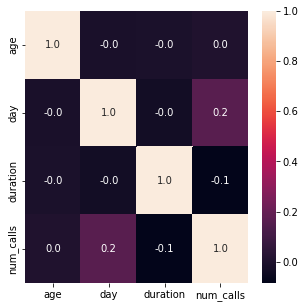

In [ ]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, fmt='.1f')

**Check Feature Distribution**

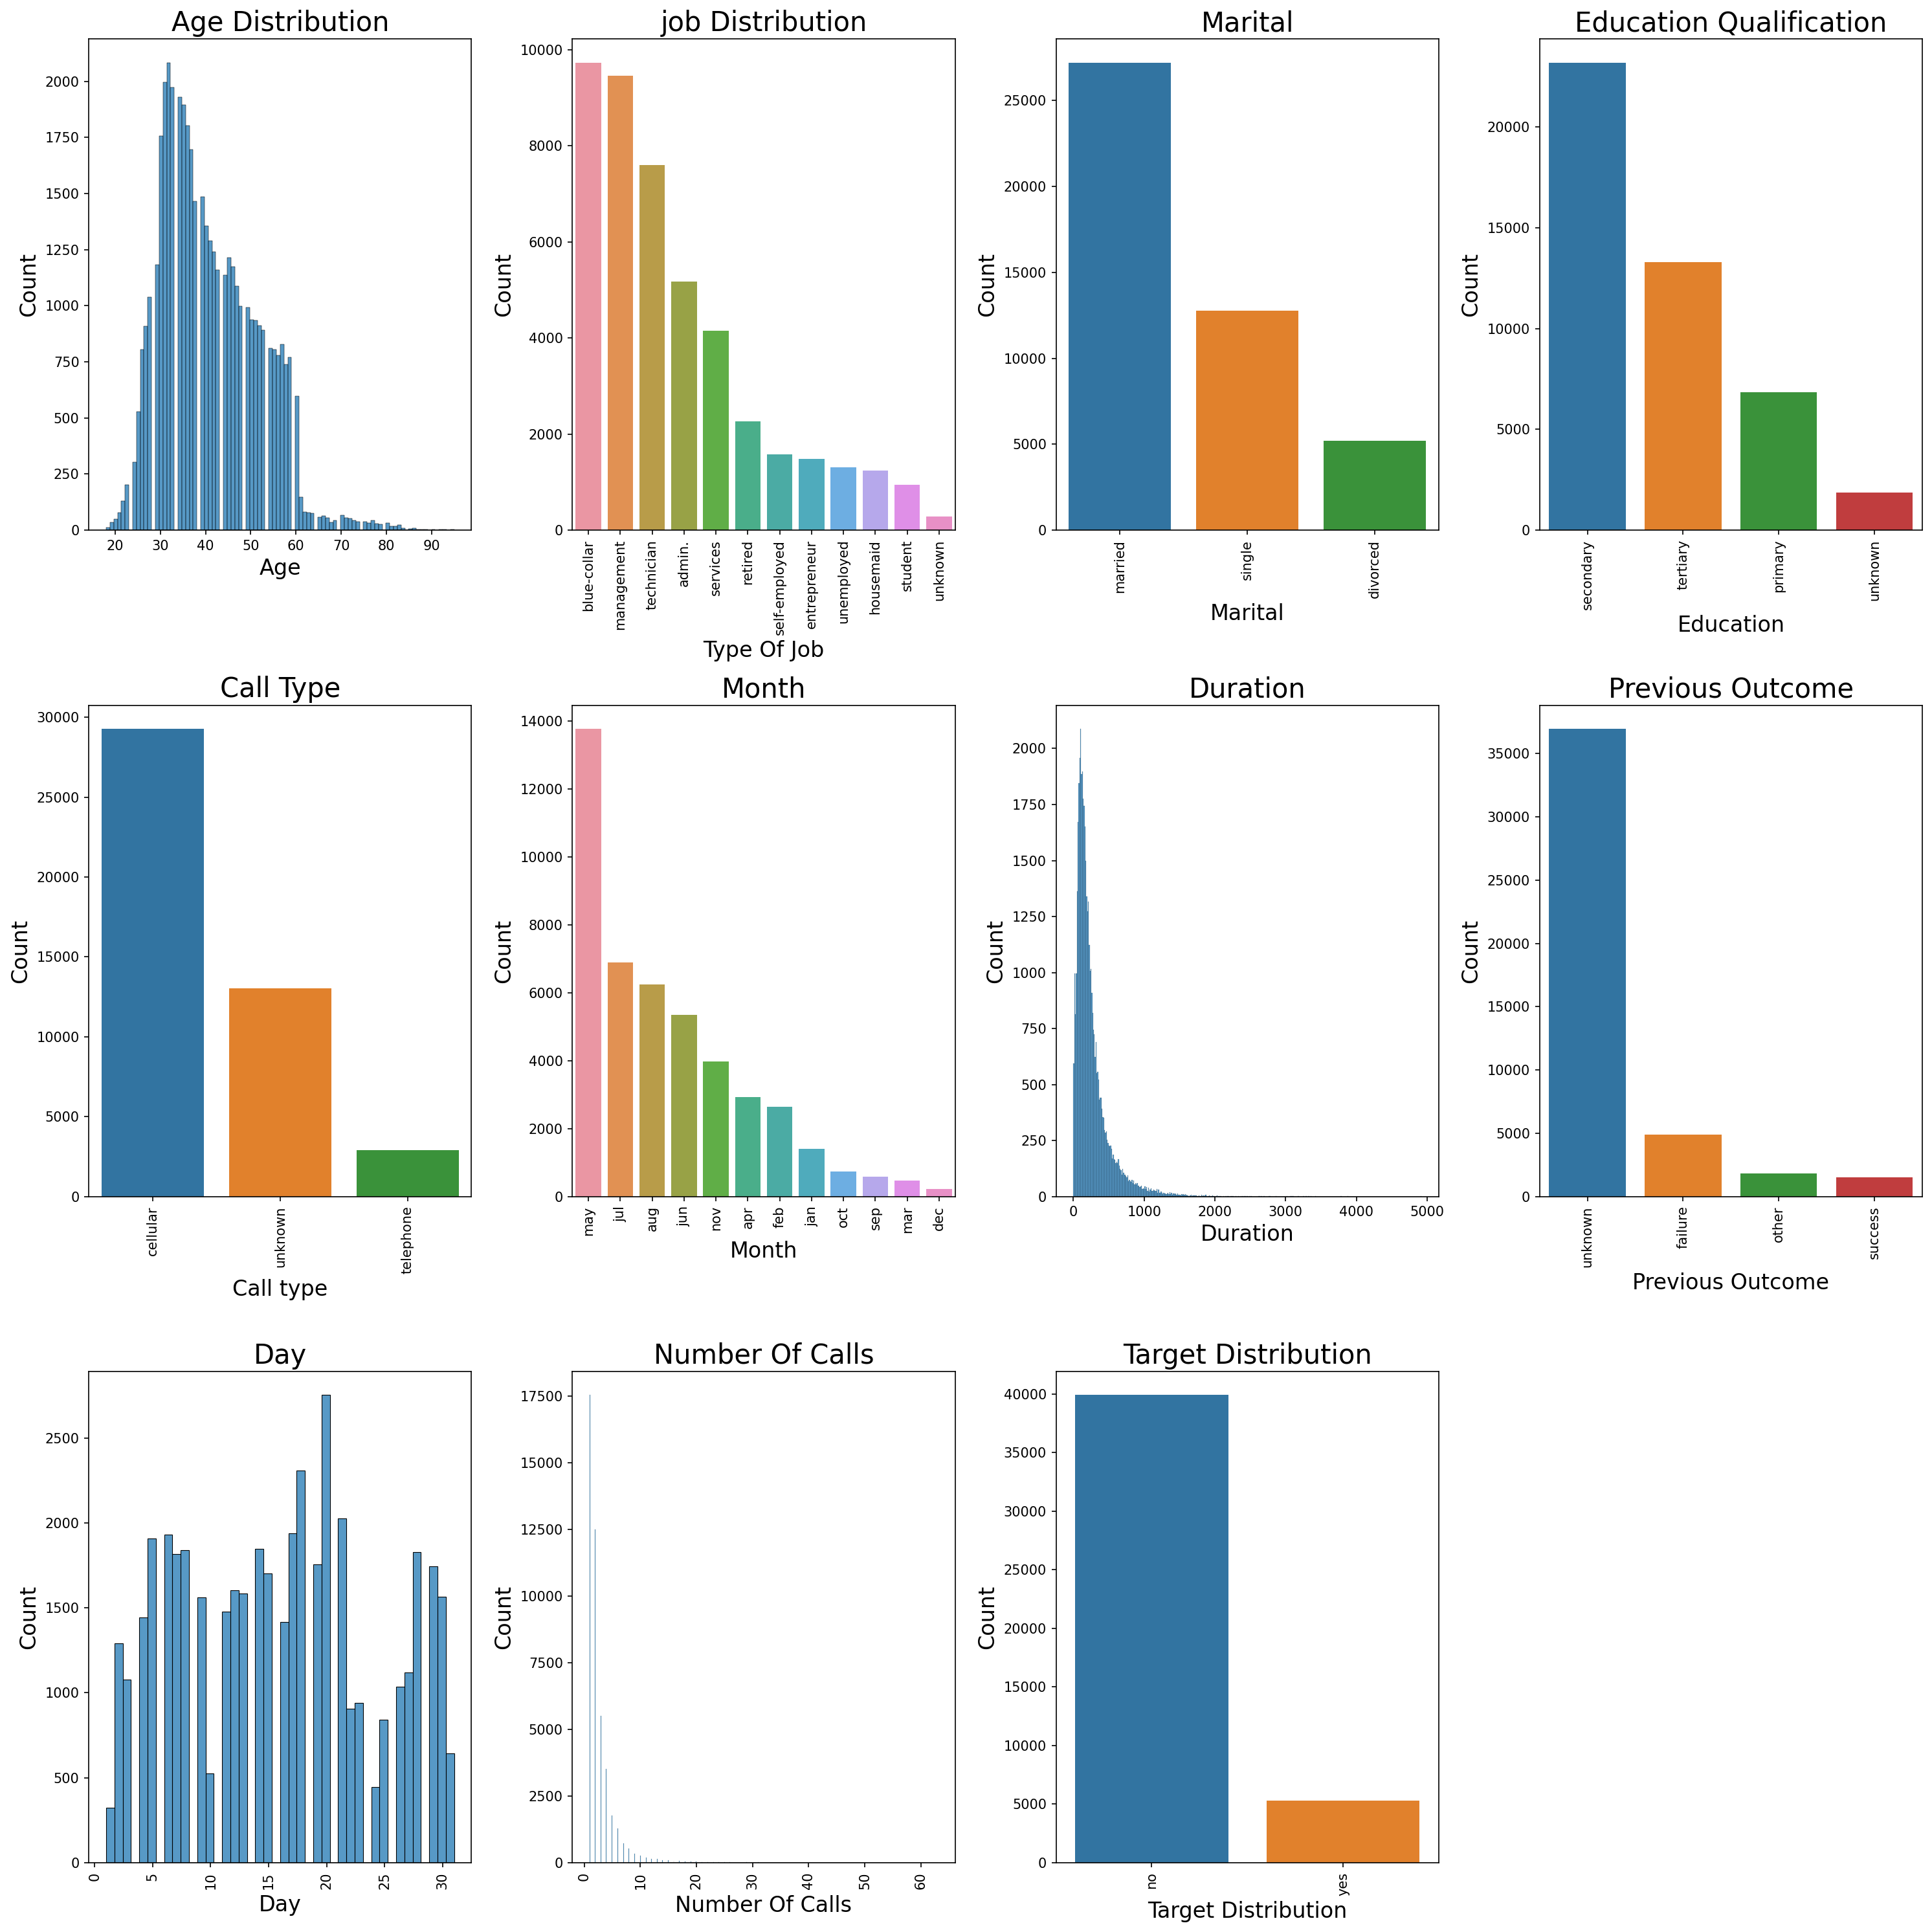

In [ ]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(df['job'],order=df.job.value_counts().index) 
plt.title('job Distribution', fontsize = 20) 
plt.xlabel('Type Of Job',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(df['marital'],order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 
 # Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(df['month'],order=df.month.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.duration) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)  
# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Target distribution 
plt.subplot(3,4,11) 
sns.countplot(df['y']) 
plt.title('Target Distribution', fontsize = 20) 
plt.xlabel('Target Distribution',fontsize = 16)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()


plt.show()

INTERPRETATION:
1. AGE 
  * Company targets 30 to 40 ages people to sell their insurance plan
  * People aged less than 25 years and more than 60 years are less targeted by the company for insurance 

2. JOB
  * Blue collar and management people are targeted most by insurance company
  * Students are least targeted for insurance plan

3. MARITAL STATUS
  * Married people are targeted the most and divorced people are least targeted 

4. EDUCATIONAL QUALIFICATION
  * Secondary qualified people have been targeted thye most for insurance followed by tertiary and primary

5. CALL_TYPE
  * Cellur mode is most used for contacting the people for campaign

6. Month
  * May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company

7. Duration 
  * maximum number of calls lasted less than 1000 seconds

8. Previous Outcome
  * More unknown as status than failure and success

9. Day
  * Most number of calls are between in the mid of month

10. Number of Calls
  * Most People are contacted only 1 or 2 times by the company

11. Target
  * No of people subscribed is very less compared to Unsubcribed people

**Features vs Features**

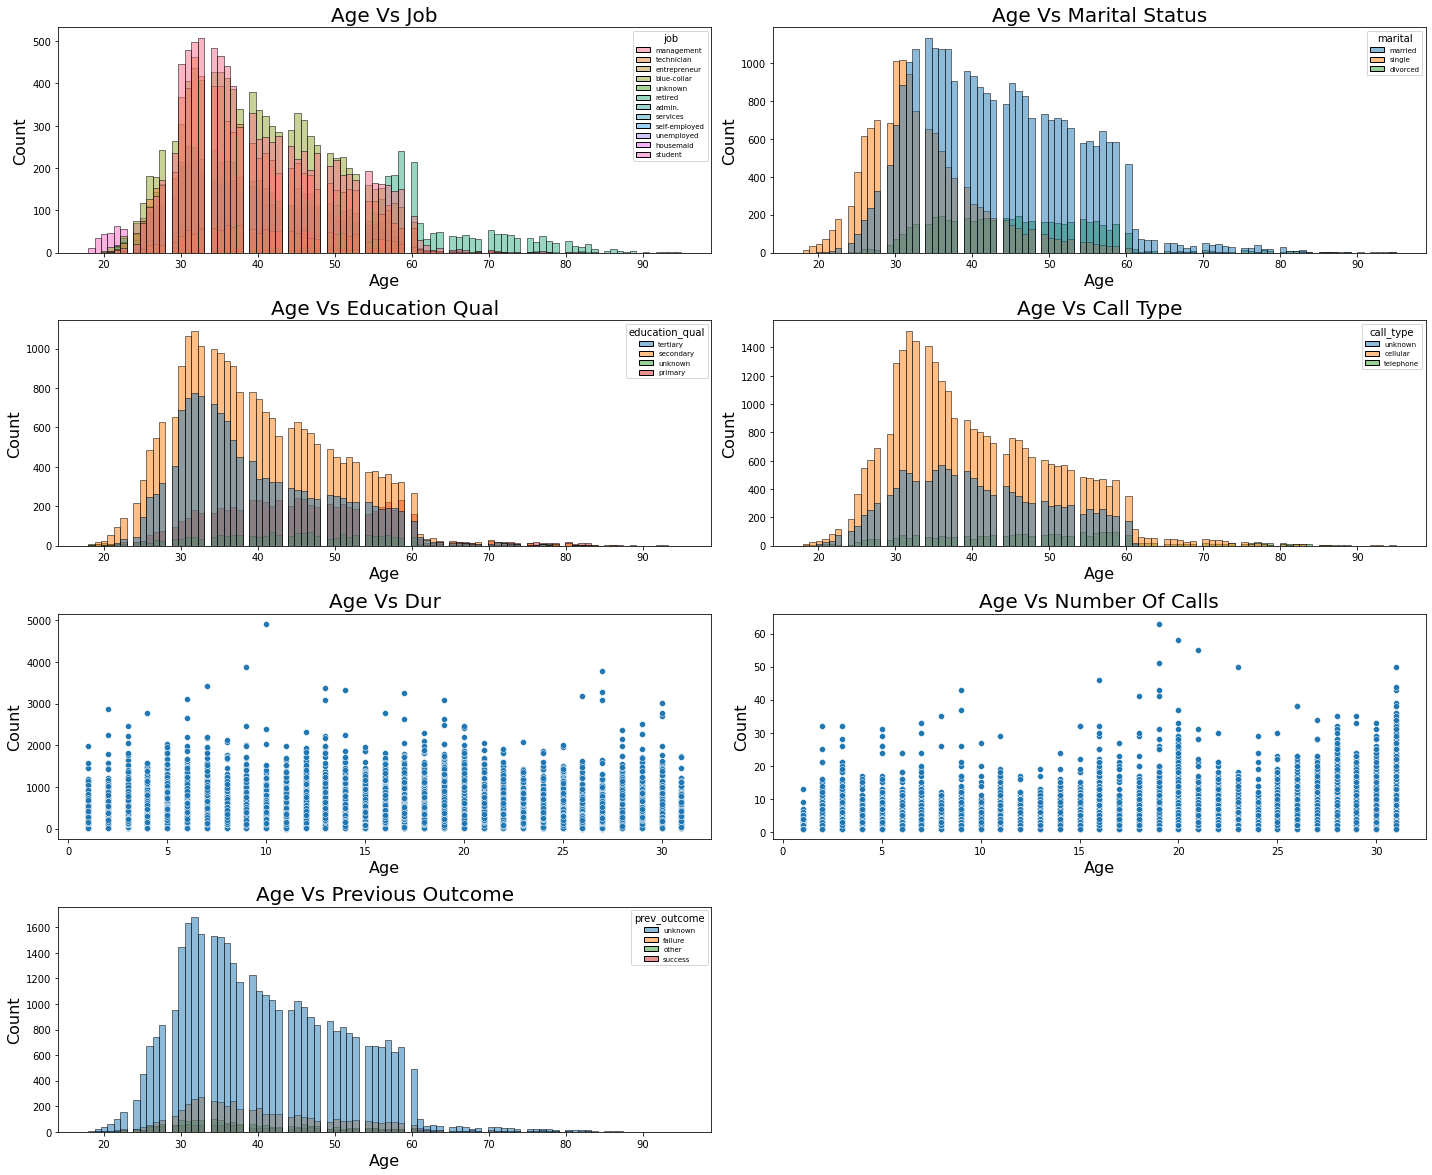

In [ ]:
# Age vs job
plt.figure(figsize = (20,20))
plt.subplot(5,2,1)
ax = sns.histplot(x = 'age',hue = 'job',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Job',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# Age vs marital
plt.subplot(5,2,2)
ax = sns.histplot(x = 'age',hue = 'marital',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Marital Status',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs education qual
plt.subplot(5,2,3)
ax = sns.histplot(x = 'age',hue = 'education_qual',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Education Qual',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs call type
plt.subplot(5,2,4)
ax = sns.histplot(x = 'age',hue = 'call_type',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Call Type',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs day
plt.subplot(5,2,5)
sns.scatterplot(x ='day' ,y = 'duration',data = df)
plt.title('Age Vs Dur',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs num calls
plt.subplot(5,2,6)
sns.scatterplot(x ='day' ,y = 'num_calls',data = df)
plt.title('Age Vs Number Of Calls',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs previous outcome
plt.subplot(5,2,7)
ax = sns.histplot(x = 'age',hue = 'prev_outcome',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Previous Outcome',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)


plt.tight_layout()
plt.show()

**Plotting of Numerical data vs Target**

Here we are plotting all our Numerical columns with target to figure out, is there any relation between numerical features column. Here we plot 2 type of numerical data:

* Continous variable
* discrete variable


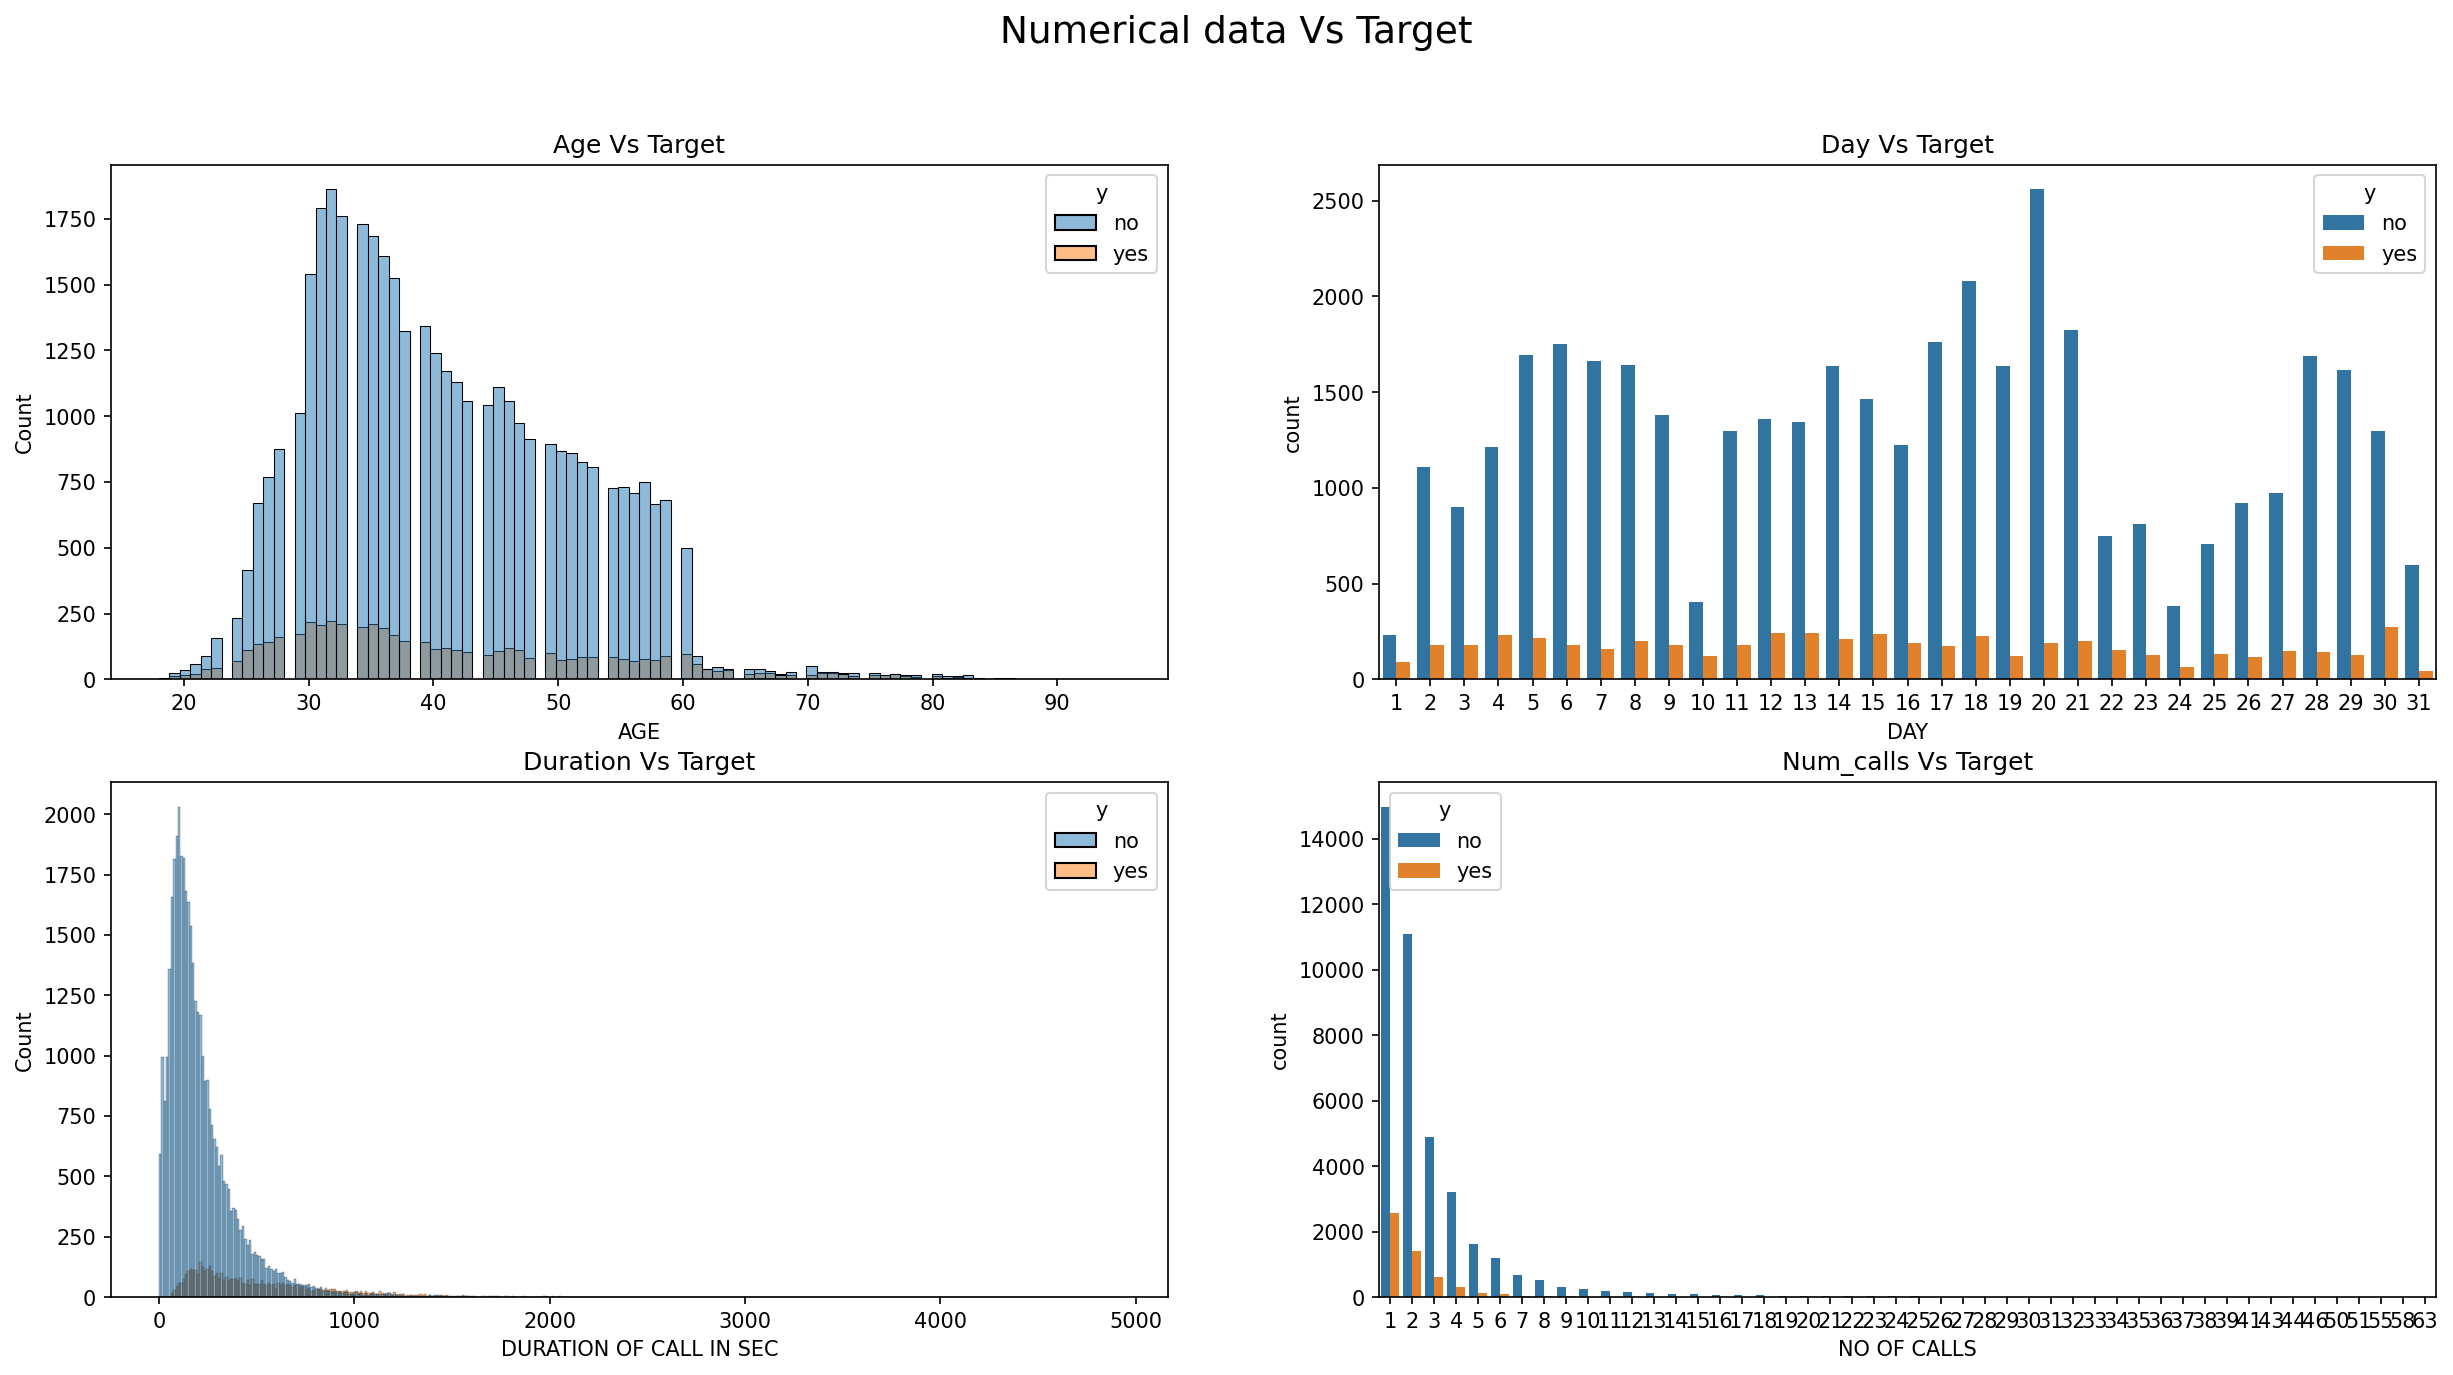

In [ ]:
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")

plt.subplot(2,2,2)
sns.countplot(x='day',hue='y',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")

plt.subplot(2,2,3)
sns.histplot(x='duration',hue='y',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION OF CALL IN SEC")

plt.subplot(2,2,4)
sns.countplot(x='num_calls',hue='y',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NO OF CALLS")

plt.suptitle("Numerical data Vs Target", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

INTERPRETATION:

1. AGE VS TARGET

* 



**Categorical Columns**

Plotting of Categorical data vs Target



From the above plot 
* we can see Blue collar JOb type person have been contacted the most and 

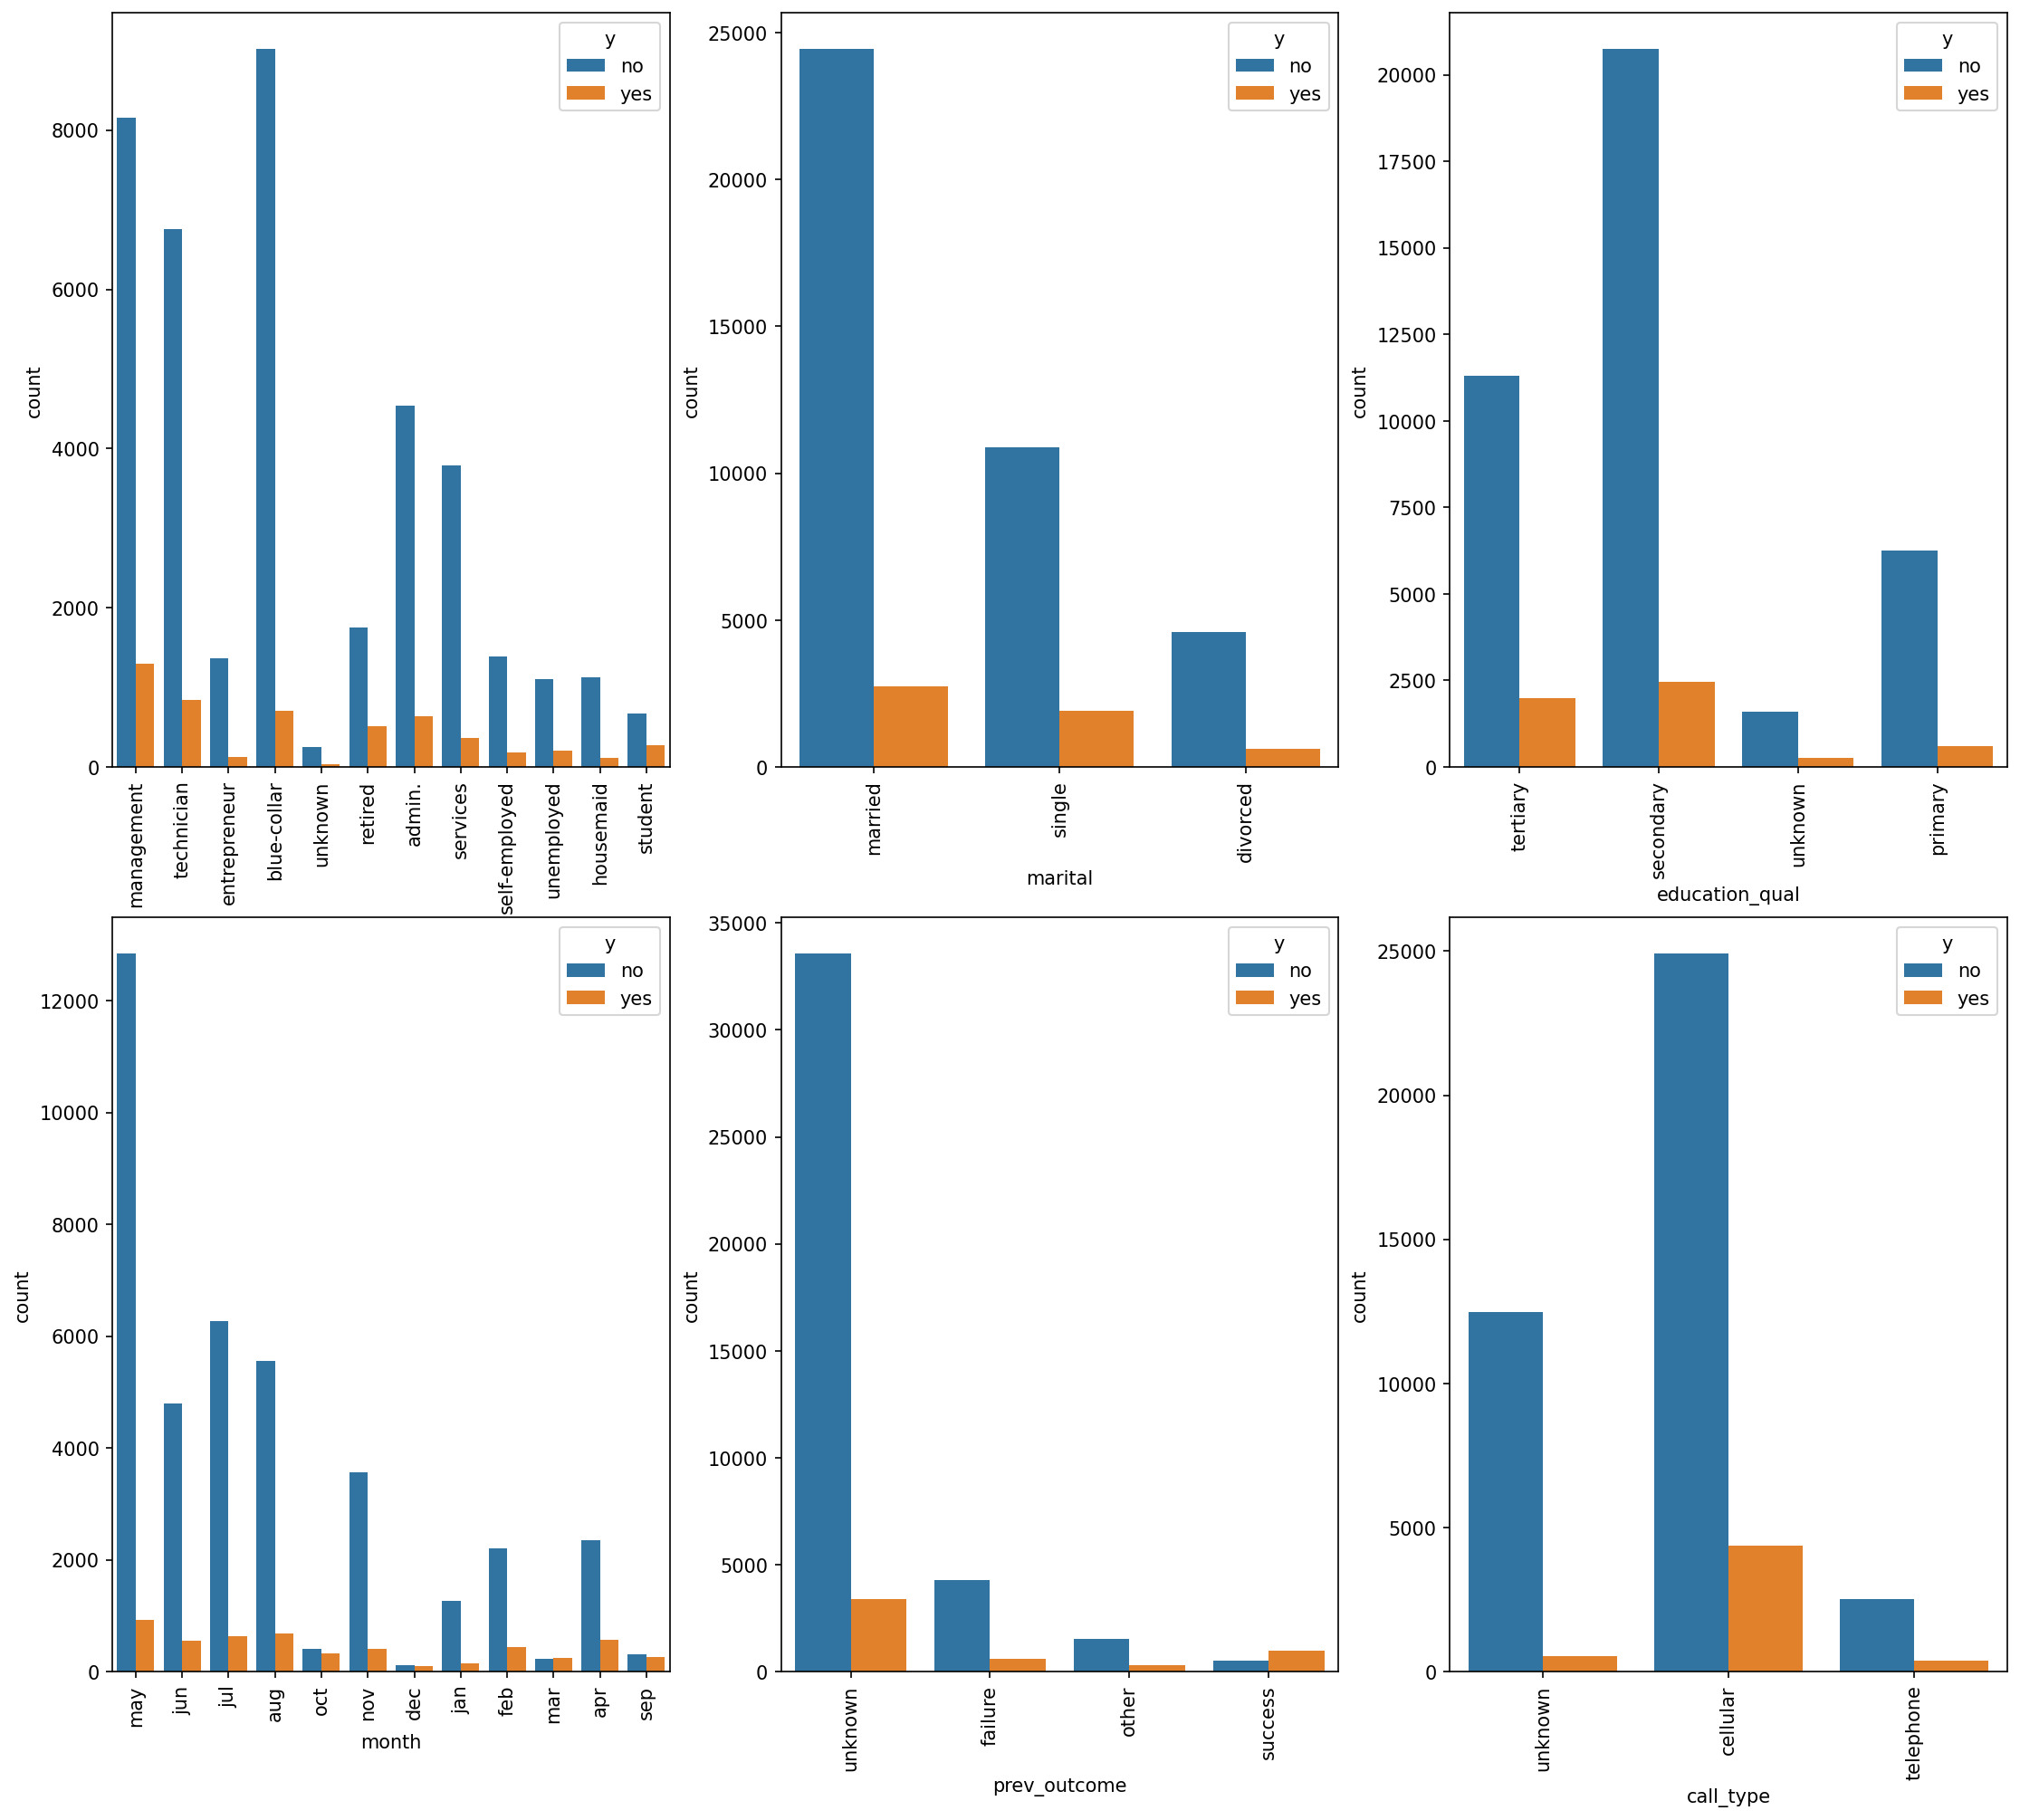

In [ ]:

plt.figure(figsize=(18,25), dpi=150)

plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)
plt.xticks(rotation=90)


plt.subplot(3,3,4)
sns.countplot(x='month',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)
plt.xticks(rotation=90)


plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)
plt.xticks(rotation=90)

plt.show()

Interpretation:
1. 

# Data Encoding

In [ ]:
n_df = df.copy()

In [ ]:
n_df = pd.get_dummies(n_df,columns=['job'],drop_first=True)

In [ ]:
n_df['marital'] = n_df['marital'].map({'married':0,'single':1,'divorced':2})

In [ ]:
n_df['education_qual'] = n_df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})

In [ ]:
n_df['call_type']= n_df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})

In [ ]:
n_df = pd.get_dummies(n_df,columns=['month'],drop_first=True)

In [ ]:
n_df = pd.get_dummies(n_df,columns=['prev_outcome'],drop_first=True)

In [ ]:
n_df['y'] = n_df['y'].map({'no':0,'yes':1})

In [ ]:
n_df.head()

,age,marital,education_qual,call_type,day,duration,num_calls,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,0,1,1,5,261,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,0,1,5,151,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,0,1,5,76,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,0,3,1,5,92,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,3,1,5,198,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = n_df.drop('y',axis = 1)
y = n_df['y']

**Splitting The data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building With Outliers Data

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

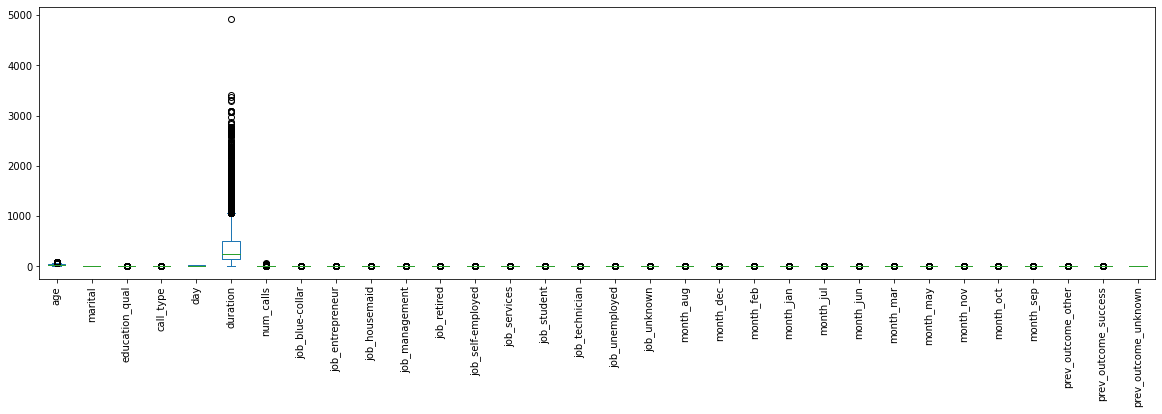

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.7


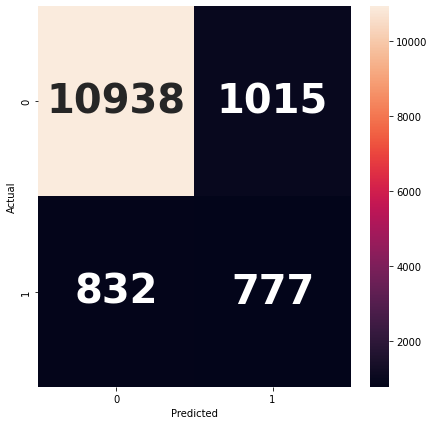

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9115496017378713
K value  :  2 Train accuracy : 0.961712527154236  cross val score :  0.9118573497465604
K value  :  3 Train accuracy : 0.9536205648081101  cross val score :  0.9147356987690081
K value  :  4 Train accuracy : 0.9453656770456191  cross val score :  0.9142831281679943
K value  :  5 Train accuracy : 0.9419623461259957  cross val score :  0.9145546705286025
K value  :  6 Train accuracy : 0.937599565532223  cross val score :  0.9132874728457641
K value  :  7 Train accuracy : 0.9364590876176684  cross val score :  0.9139572773352643
K value  :  8 Train accuracy : 0.9337798696596669  cross val score :  0.9124547429398987
K value  :  9 Train accuracy : 0.9327480086893555  cross val score :  0.9125090514120202
K value  :  10 Train accuracy : 0.9304851556842867  cross val score :  0.9116944243301954
K value  :  20 Train accuracy : 0.9214337436640115  cross val score :  0.9088522809558292


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.6540205872628226

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.65


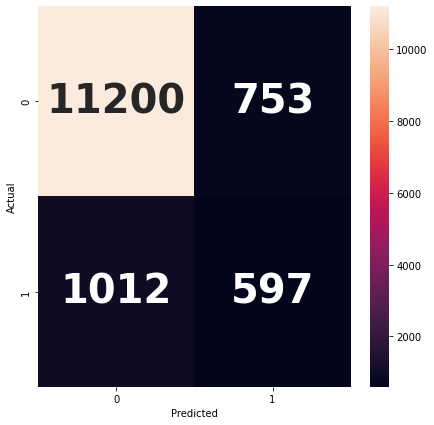

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7169985517740768  Cross val score :  0.716220130340333
Depth  :  2  Training Accuracy :  0.7675778421433744  Cross val score :  0.7684467776973208
Depth  :  3  Training Accuracy :  0.7968139029688632  Cross val score :  0.7969587255611874
Depth  :  4  Training Accuracy :  0.8371288921071687  Cross val score :  0.8341600289645186
Depth  :  5  Training Accuracy :  0.8460354815351193  Cross val score :  0.8433743664011585
Depth  :  6  Training Accuracy :  0.8597755249818971  Cross val score :  0.853222302679218
Depth  :  7  Training Accuracy :  0.8849746560463432  Cross val score :  0.8771904417089067
Depth  :  8  Training Accuracy :  0.9001267197682838  Cross val score :  0.8902787834902245
Depth  :  9  Training Accuracy :  0.913124547429399  Cross val score :  0.8982078204199855
Depth  :  10  Training Accuracy :  0.9235879797248371  Cross val score :  0.9036929761042722


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.763


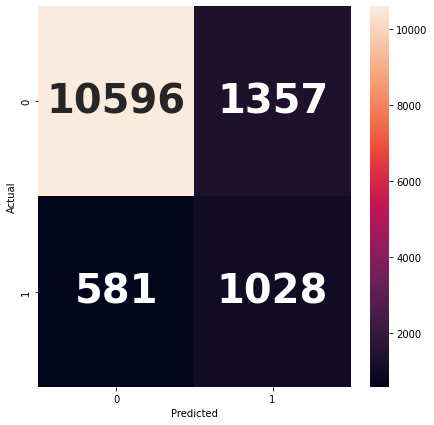

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8359341057204924  Cross val score :  0.8183743664011587
Depth  :  2  Training Accuracy :  0.8431209268645908  Cross val score :  0.8407856625633598
Depth  :  3  Training Accuracy :  0.8496560463432297  Cross val score :  0.8541817523533671
Depth  :  4  Training Accuracy :  0.8693881245474294  Cross val score :  0.8699312092686459
Depth  :  5  Training Accuracy :  0.8781136857349745  Cross val score :  0.8756335988414193
Depth  :  6  Training Accuracy :  0.8914916727009412  Cross val score :  0.8851194786386676
Depth  :  7  Training Accuracy :  0.9008689355539464  Cross val score :  0.8941889934829833
Depth  :  8  Training Accuracy :  0.9091962346125995  Cross val score :  0.9012490948587979
Depth  :  9  Training Accuracy :  0.9197682838522808  Cross val score :  0.9071506154960174
Depth  :  10  Training Accuracy :  0.9303222302679219  Cross val score :  0.9115496017378713


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.78


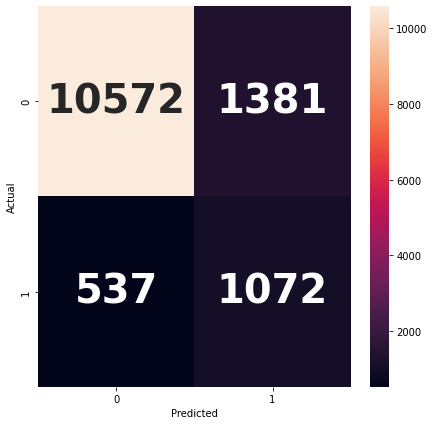

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.31
Variable: education_qual       Importance: 0.08
Variable: duration             Importance: 0.06
Variable: month                Importance: 0.03
Variable: age                  Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.77


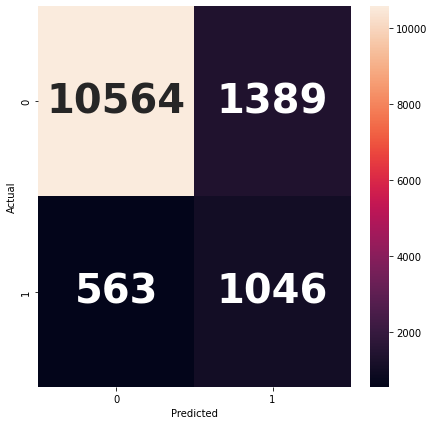

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8495655322230267  Cross-Val score :  0.8454199855177409
Learning rate :  0.02  Train score :  0.8671433743664011  Cross-Val score :  0.8621469949312092
Learning rate :  0.03  Train score :  0.8825850832729907  Cross-Val score :  0.8772990586531499
Learning rate :  0.04  Train score :  0.8937907313540913  Cross-Val score :  0.8874547429398987
Learning rate :  0.05  Train score :  0.9042903692976104  Cross-Val score :  0.8975199131064446
Learning rate :  0.1  Train score :  0.9201846488052134  Cross-Val score :  0.9104272266473569
Learning rate :  0.11  Train score :  0.9220854453294713  Cross-Val score :  0.910300506879073
Learning rate :  0.12  Train score :  0.9229543808834179  Cross-Val score :  0.91151339608979
Learning rate :  0.15  Train score :  0.9255973931933381  Cross-Val score :  0.913414192614048
Learning rate :  0.2  Train score :  0.9289826212889211  Cross-Val score :  0.9154236060825488
Learning rate :  0.5  Train score :  0.9374004

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(learning_rate=0.08)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.79


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

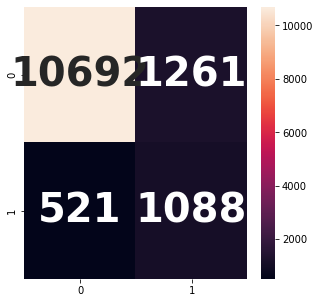

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
4,XGboost,0.785350
3,Random Forest,0.775358
2,Decision Tree,0.762689
0,Logistic regression,0.698996
1,KNN,0.654021


# Model Building Without Outliers

In [ ]:
df2=n_df[(n_df["age"].isin(age)) & (n_df["duration"].isin(dur)) & (n_df["num_calls"].isin(num_calls))]

In [ ]:
X = df2.drop('y',axis = 1)
y = df2['y']

**Spliting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building For Without Outliers

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

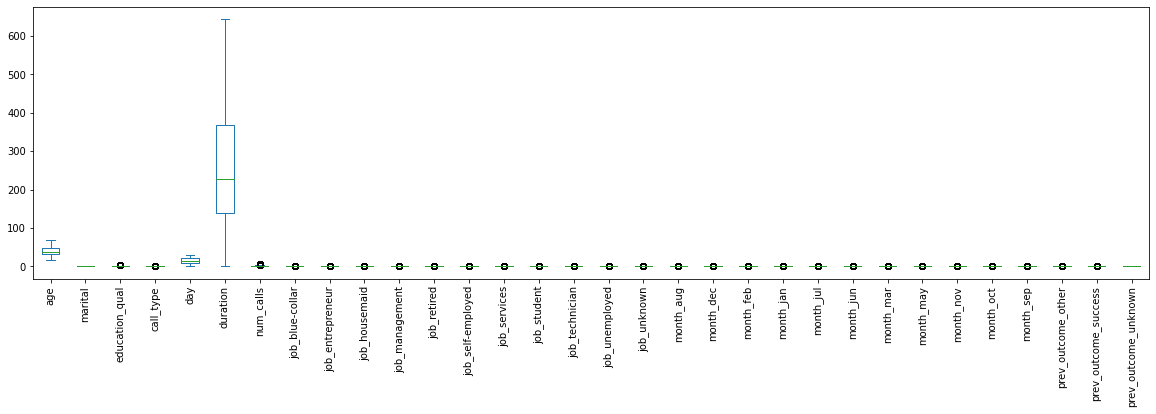

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.67


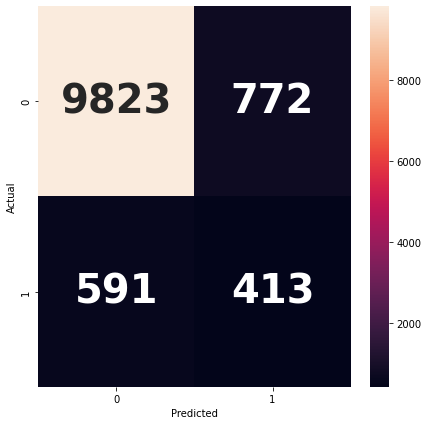

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9243900883848678
K value  :  2 Train accuracy : 0.9718859900220822  cross val score :  0.9310351595246725
K value  :  3 Train accuracy : 0.9625214688803468  cross val score :  0.929726512408125
K value  :  4 Train accuracy : 0.9575120634660997  cross val score :  0.930523945529935
K value  :  5 Train accuracy : 0.9527889097898095  cross val score :  0.9289085666716422
K value  :  6 Train accuracy : 0.9508669338349554  cross val score :  0.9298082952746144
K value  :  7 Train accuracy : 0.9475545922957389  cross val score :  0.9294606093827025
K value  :  8 Train accuracy : 0.9467162836345792  cross val score :  0.9291743944367582
K value  :  9 Train accuracy : 0.9450396663122598  cross val score :  0.928683630339771
K value  :  10 Train accuracy : 0.9440991248875439  cross val score :  0.9273955710982026
K value  :  20 Train accuracy : 0.9353071072217225  cross val score :  0.9236129086477854


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.6631446371192906

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


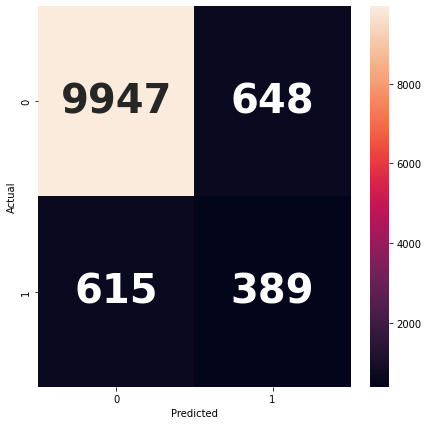

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7443771980044165  Cross val score :  0.744377519913668
Depth  :  2  Training Accuracy :  0.8015253128322565  Cross val score :  0.8014642394381568
Depth  :  3  Training Accuracy :  0.8272675226956734  Cross val score :  0.8270430560032848
Depth  :  4  Training Accuracy :  0.8413756440664104  Cross val score :  0.8412330021461731
Depth  :  5  Training Accuracy :  0.8488795289114255  Cross val score :  0.8456700613246065
Depth  :  6  Training Accuracy :  0.8658706142144436  Cross val score :  0.8565271549638981
Depth  :  7  Training Accuracy :  0.8865011859000573  Cross val score :  0.8774644175542156
Depth  :  8  Training Accuracy :  0.9029197677271612  Cross val score :  0.89786998280302
Depth  :  9  Training Accuracy :  0.9209945203238734  Cross val score :  0.9081342760941071
Depth  :  10  Training Accuracy :  0.9341416537171832  Cross val score :  0.9184597643767047


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.778


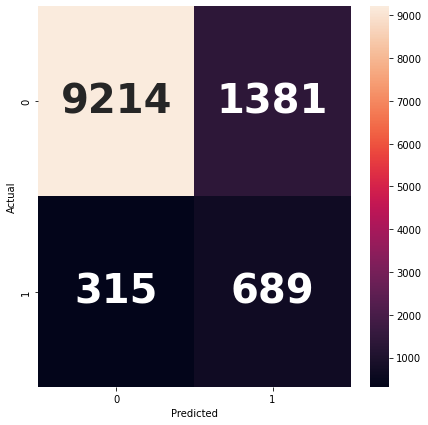

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8571194896540444  Cross val score :  0.8265730804754277
Depth  :  2  Training Accuracy :  0.8602478122188598  Cross val score :  0.8506384289996358
Depth  :  3  Training Accuracy :  0.8689375971211255  Cross val score :  0.8619046251221413
Depth  :  4  Training Accuracy :  0.8787928355279301  Cross val score :  0.8760944500123135
Depth  :  5  Training Accuracy :  0.8898339739919849  Cross val score :  0.8865630583112674
Depth  :  6  Training Accuracy :  0.9017543142226221  Cross val score :  0.8967046731214923
Depth  :  7  Training Accuracy :  0.9127545595812546  Cross val score :  0.9029000388426806
Depth  :  8  Training Accuracy :  0.9208309479021838  Cross val score :  0.9115898196219507
Depth  :  9  Training Accuracy :  0.9288664431176904  Cross val score :  0.9189301747418884
Depth  :  10  Training Accuracy :  0.9385581091028052  Cross val score :  0.9234489582510174


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.74


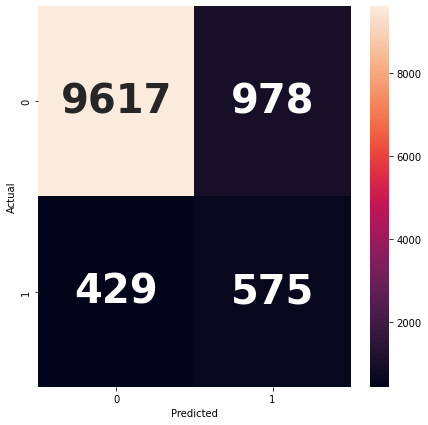

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.17
Variable: education_qual       Importance: 0.08
Variable: duration             Importance: 0.08
Variable: month                Importance: 0.04
Variable: age                  Importance: 0.01
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.74


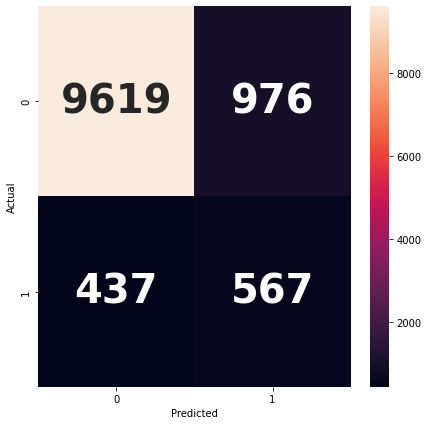

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8329516643493907  Cross-Val score :  0.8318479332056417
Learning rate :  0.02  Train score :  0.8621288950682915  Cross-Val score :  0.8597166867569873
Learning rate :  0.03  Train score :  0.8924306861863089  Cross-Val score :  0.8878717179711995
Learning rate :  0.04  Train score :  0.9060685368446879  Cross-Val score :  0.8998535141754879
Learning rate :  0.05  Train score :  0.9184387012349717  Cross-Val score :  0.9115899074256417
Learning rate :  0.1  Train score :  0.9309110983888117  Cross-Val score :  0.9216088312116198
Learning rate :  0.11  Train score :  0.9319538725770835  Cross-Val score :  0.9222427445928606
Learning rate :  0.12  Train score :  0.9330170933180666  Cross-Val score :  0.9220996622066572
Learning rate :  0.15  Train score :  0.9355115727488345  Cross-Val score :  0.9236944824578679
Learning rate :  0.2  Train score :  0.9383536435756931  Cross-Val score :  0.9239807977508875
Learning rate :  0.5  Train score :  0.948

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(learning_rate=0.08)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.75


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

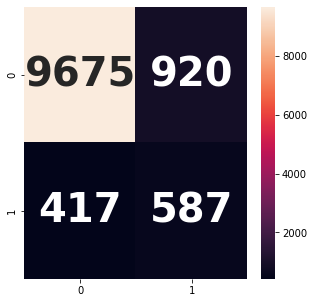

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.777955
4,XGboost,0.748914
3,Random Forest,0.740201
0,Logistic regression,0.669245
1,KNN,0.663145


# Model Building With Caping Data

In [ ]:
df3 = n_df.copy()

In [ ]:
# Age 
low = df3['age'].quantile(0.25)
high = df3['age'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['age'] = df3['age'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['age'] = df3['age'].apply(lambda x: percentile_1 if x < percentile_1 else x)

# Duretion
low = df3['duration'].quantile(0.25)
high = df3['duration'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['duration'] = df3['duration'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['duration'] = df3['duration'].apply(lambda x: percentile_1 if x < percentile_1 else x)

# Num Calls
low = df3['num_calls'].quantile(0.25)
high = df3['num_calls'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['num_calls'] = df3['num_calls'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['num_calls'] = df3['num_calls'].apply(lambda x: percentile_1 if x < percentile_1 else x)

In [ ]:
X =  df3.drop('y',axis = 1)
y = df3['y']

**Spliting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building For Caping Data

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

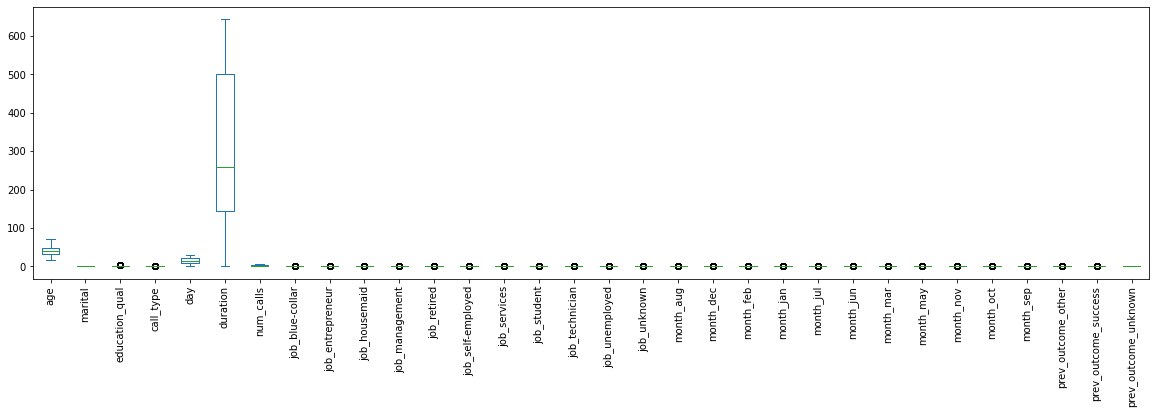

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.69


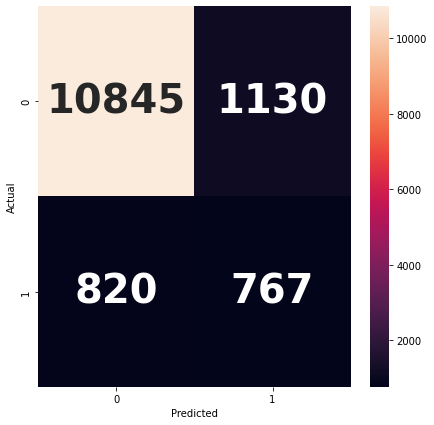

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 0.9999639782428587  cross val score :  0.9101306586620623
K value  :  2 Train accuracy : 0.963437916501567  cross val score :  0.9116629261852383
K value  :  3 Train accuracy : 0.9534598897734231  cross val score :  0.9131567120298968
K value  :  4 Train accuracy : 0.9456611793523287  cross val score :  0.9130134663818555
K value  :  5 Train accuracy : 0.9408162530168221  cross val score :  0.9133548777538533
K value  :  6 Train accuracy : 0.9378084362955227  cross val score :  0.9120407174043577
K value  :  7 Train accuracy : 0.9349807283599294  cross val score :  0.911067621365194
K value  :  8 Train accuracy : 0.9315046287957928  cross val score :  0.9107438225618367
K value  :  9 Train accuracy : 0.9304239760815534  cross val score :  0.9109955979606525
K value  :  10 Train accuracy : 0.9277223442959547  cross val score :  0.9104376557885214
K value  :  20 Train accuracy : 0.9196714815748712  cross val score :  0.9069074580502997


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.6725513797517143

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.67


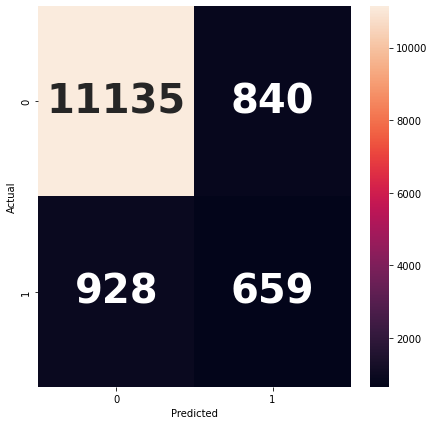

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7187961528763374  Cross val score :  0.7186879732688565
Depth  :  2  Training Accuracy :  0.7224523612261806  Cross val score :  0.7226507201237642
Depth  :  3  Training Accuracy :  0.8137855264579805  Cross val score :  0.813751102164056
Depth  :  4  Training Accuracy :  0.8245200100860922  Cross val score :  0.8241253527054722
Depth  :  5  Training Accuracy :  0.8409099095853896  Cross val score :  0.8402273630163822
Depth  :  6  Training Accuracy :  0.8597492885702964  Cross val score :  0.857247659571818
Depth  :  7  Training Accuracy :  0.8825870825978891  Cross val score :  0.8756192812670773
Depth  :  8  Training Accuracy :  0.9002017218399914  Cross val score :  0.8893255832841607
Depth  :  9  Training Accuracy :  0.9122149778466193  Cross val score :  0.8971967310294147
Depth  :  10  Training Accuracy :  0.9224811786318936  Cross val score :  0.9045091776078668


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.788


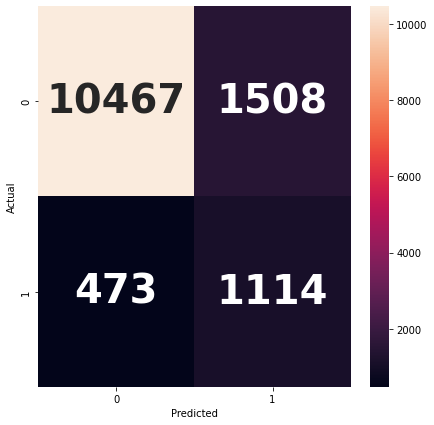

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7970714311444111  Cross val score :  0.8034127514218501
Depth  :  2  Training Accuracy :  0.8373617665069703  Cross val score :  0.8292948394590042
Depth  :  3  Training Accuracy :  0.8587046576131985  Cross val score :  0.8527629644074315
Depth  :  4  Training Accuracy :  0.8699614567198587  Cross val score :  0.8671724425512393
Depth  :  5  Training Accuracy :  0.8786607110694861  Cross val score :  0.8804102729474579
Depth  :  6  Training Accuracy :  0.8960592197687404  Cross val score :  0.8868580656612128
Depth  :  7  Training Accuracy :  0.9044883109398079  Cross val score :  0.8957196495546453
Depth  :  8  Training Accuracy :  0.9099636180252874  Cross val score :  0.9032302456392189
Depth  :  9  Training Accuracy :  0.9181405568963654  Cross val score :  0.9071027305125199
Depth  :  10  Training Accuracy :  0.9292532689744606  Cross val score :  0.9132084696280172


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.77


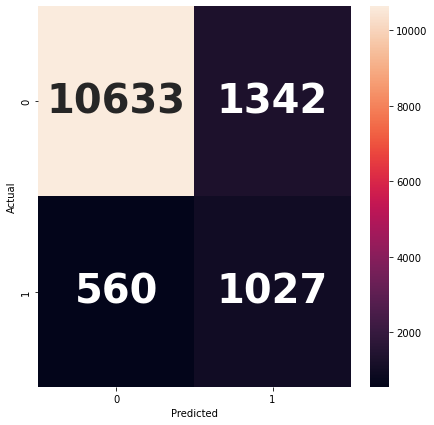

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.31
Variable: education_qual       Importance: 0.07
Variable: month                Importance: 0.07
Variable: duration             Importance: 0.06
Variable: age                  Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.78


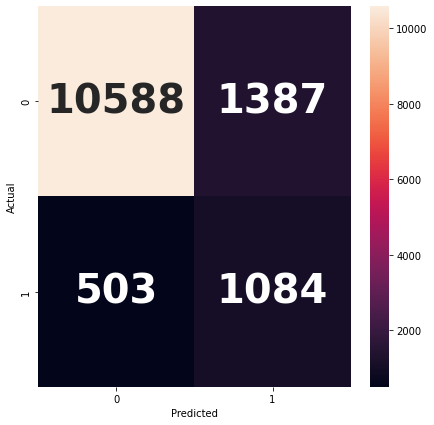

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8439537480638307  Cross-Val score :  0.8430904530925725
Learning rate :  0.02  Train score :  0.8610820935845251  Cross-Val score :  0.8590664248782105
Learning rate :  0.03  Train score :  0.8839018767335473  Cross-Val score :  0.8817246052060028
Learning rate :  0.04  Train score :  0.8962753503115881  Cross-Val score :  0.8926575374528192
Learning rate :  0.05  Train score :  0.9058211159540362  Cross-Val score :  0.9000243851364711
Learning rate :  0.1  Train score :  0.9210583192248119  Cross-Val score :  0.9128129879946505
Learning rate :  0.11  Train score :  0.9226072547818882  Cross-Val score :  0.9136957215016315
Learning rate :  0.12  Train score :  0.9229134397175894  Cross-Val score :  0.9147583886426374
Learning rate :  0.15  Train score :  0.9268758330031339  Cross-Val score :  0.9161997519579467
Learning rate :  0.2  Train score :  0.9301538129029934  Cross-Val score :  0.9183253651867179
Learning rate :  0.5  Train score :  0.941

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(learning_rate=0.08)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.78


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

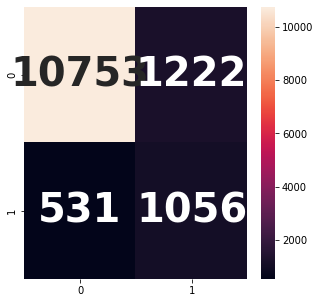

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.788012
4,XGboost,0.781680
3,Random Forest,0.767533
0,Logistic regression,0.694469
1,KNN,0.672551


# Model Building With Important Features

In [ ]:
new_df = n_df[['age','education_qual','duration','day','month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','y']]
new_df.head()

,age,education_qual,duration,day,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,1,261,5,0,0,0,0,0,0,0,1,0,0,0,0
1,44,0,151,5,0,0,0,0,0,0,0,1,0,0,0,0
2,33,0,76,5,0,0,0,0,0,0,0,1,0,0,0,0
3,47,3,92,5,0,0,0,0,0,0,0,1,0,0,0,0
4,33,3,198,5,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X = new_df.drop('y',axis = 1)
y = new_df['y']

**Spliting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance Data And Model Building With  Important Features

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

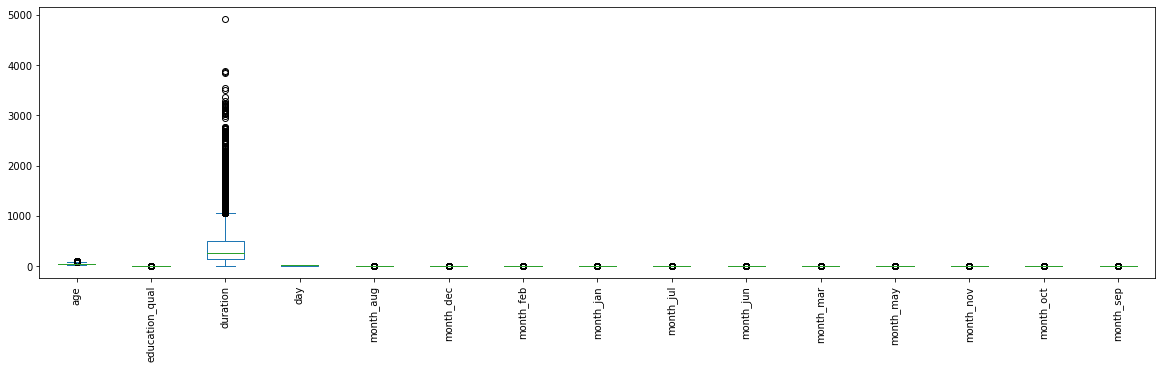

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.7


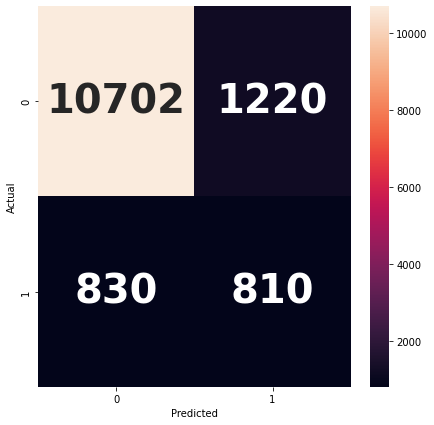

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 0.9995960337862652  cross val score :  0.9074182886522217
K value  :  2 Train accuracy : 0.9634226955563716  cross val score :  0.9029930224017628
K value  :  3 Train accuracy : 0.9513771575468234  cross val score :  0.908960705104664
K value  :  4 Train accuracy : 0.9429673154608886  cross val score :  0.9070510466397357
K value  :  5 Train accuracy : 0.9376055820785898  cross val score :  0.9078038927653325
K value  :  6 Train accuracy : 0.9338046272493573  cross val score :  0.9063349247153873
K value  :  7 Train accuracy : 0.9301138450238706  cross val score :  0.904719059860448
K value  :  8 Train accuracy : 0.9273595299302241  cross val score :  0.9036724201248623
K value  :  9 Train accuracy : 0.9249173705471905  cross val score :  0.902956298200514
K value  :  10 Train accuracy : 0.9230995225853839  cross val score :  0.900826294528094
K value  :  20 Train accuracy : 0.9109621740727138  cross val score :  0.8977230995225854


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.7088126685242696

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.71


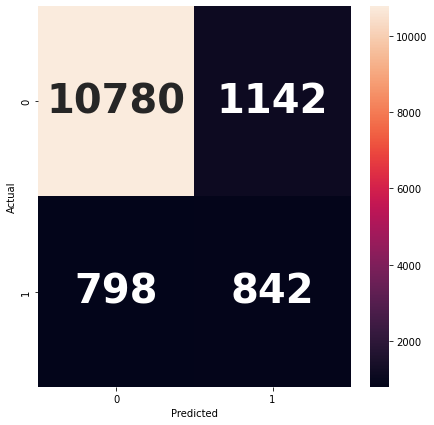

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.72240176276166  Cross val score :  0.7224017627616599
Depth  :  2  Training Accuracy :  0.7600440690414983  Cross val score :  0.7600440690414982
Depth  :  3  Training Accuracy :  0.7873301505692251  Cross val score :  0.7871832537642306
Depth  :  4  Training Accuracy :  0.8080609621740727  Cross val score :  0.8077671685640837
Depth  :  5  Training Accuracy :  0.8313808299669482  Cross val score :  0.8270473742196108
Depth  :  6  Training Accuracy :  0.8591994124127801  Cross val score :  0.8566287183253765
Depth  :  7  Training Accuracy :  0.8747337495409474  Cross val score :  0.8657363202350348
Depth  :  8  Training Accuracy :  0.8899192067572531  Cross val score :  0.8836944546456115
Depth  :  9  Training Accuracy :  0.9053984575835475  Cross val score :  0.8921777451340434
Depth  :  10  Training Accuracy :  0.9164524421593829  Cross val score :  0.8997429305912596


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.758


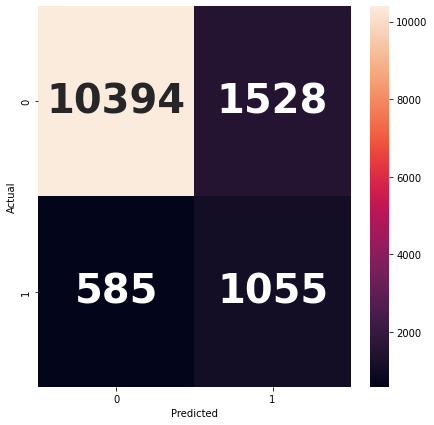

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7657730444362835  Cross val score :  0.7725302974660302
Depth  :  2  Training Accuracy :  0.801946382666177  Cross val score :  0.7844656628718326
Depth  :  3  Training Accuracy :  0.8056922511935366  Cross val score :  0.8131472640470069
Depth  :  4  Training Accuracy :  0.8346125596768269  Cross val score :  0.837146529562982
Depth  :  5  Training Accuracy :  0.8638450238707309  Cross val score :  0.8565552699228792
Depth  :  6  Training Accuracy :  0.8886705839147999  Cross val score :  0.8733749540947484
Depth  :  7  Training Accuracy :  0.8888358428204186  Cross val score :  0.8820418655894233
Depth  :  8  Training Accuracy :  0.9011751744399559  Cross val score :  0.8895519647447667
Depth  :  9  Training Accuracy :  0.9064267352185089  Cross val score :  0.8953360264414248
Depth  :  10  Training Accuracy :  0.9185273595299304  Cross val score :  0.9032868160117518


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.79


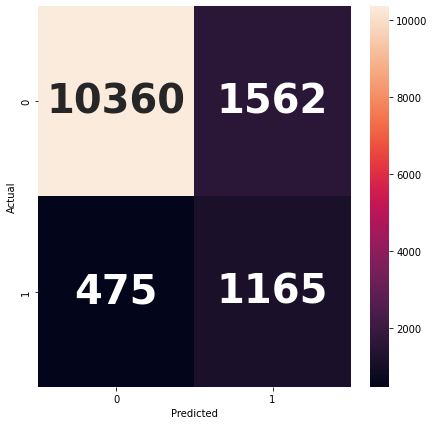

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: marital              Importance: 0.43
Variable: num_calls            Importance: 0.09
Variable: call_type            Importance: 0.06
Variable: prev_outcome         Importance: 0.06
Variable: age                  Importance: 0.04
Variable: education_qual       Importance: 0.04
Variable: job                  Importance: 0.03
Variable: month                Importance: 0.02
Variable: duration             Importance: 0.02
Variable: day                  Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.79


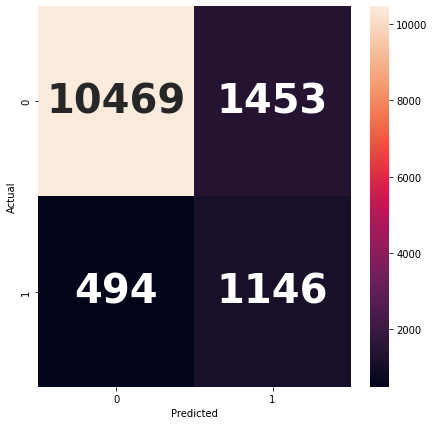

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8085751009915534  Cross-Val score :  0.8057106132941609
Learning rate :  0.02  Train score :  0.8546088872567023  Cross-Val score :  0.8521667278736687
Learning rate :  0.03  Train score :  0.8722181417554168  Cross-Val score :  0.8700146896804994
Learning rate :  0.04  Train score :  0.8800954829232464  Cross-Val score :  0.8779287550495777
Learning rate :  0.05  Train score :  0.8928571428571429  Cross-Val score :  0.8895886889460154
Learning rate :  0.1  Train score :  0.9033419023136247  Cross-Val score :  0.8976680132207123
Learning rate :  0.11  Train score :  0.9040396621373484  Cross-Val score :  0.8981270657363203
Learning rate :  0.12  Train score :  0.9044987146529563  Cross-Val score :  0.8981821520381932
Learning rate :  0.15  Train score :  0.9052699228791774  Cross-Val score :  0.8982372383400662
Learning rate :  0.2  Train score :  0.9076019096584649  Cross-Val score :  0.8995042232831437
Learning rate :  0.5  Train score :  0.913

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(learning_rate=0.08)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.78


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

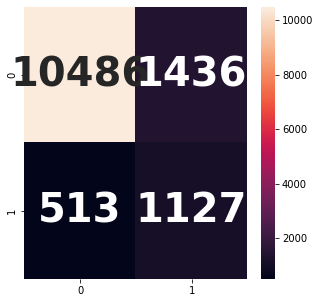

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
3,Random Forest,0.789674
4,XGboost,0.783373
2,Decision Tree,0.757563
1,KNN,0.708813
0,Logistic regression,0.695785
